# Visualisation of epidemiological data from Minion sequencing data

In [133]:
%matplotlib inline
pd.options.display.mpl_style = 'default'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium
from ipykernel import kernelapp as app
import IPython.display as display

## Displaying a map in folium

First we just want to get a map displayed, preferably of Queensland.

In [297]:
# Folium defaults to OpenStreetMap tiles, but Stamen Terrain, Stamen Toner, 
# Mapbox Bright, and Mapbox Control room tiles are built in
map_1 = folium.Map(location=[-27.46499, 153.02661366666666], zoom_start=12,
                  tiles='OpenStreetMap')
display.display(map_1)

In [252]:
# import a table of postcode -> latitude and longitude for map display 
pc_df = pd.read_csv("/home/jake/workspace/healthhack/data/Australian_Post_Codes_Lat_Lon.csv")
pc_df.head()

,postcode,suburb,state,dc,type,lat,lon
0,200,AUSTRALIAN NATIONAL UNIVERSITY,ACT,AUSTRALIAN NATIONAL UNI LPO,Post Office Boxes,-35.277272,149.117136
1,221,BARTON,ACT,NaN,LVR,-35.201372,149.095065
2,800,DARWIN,NT,DARWIN DELIVERY CENTRE,Delivery Area,-12.801028,130.955789
3,801,DARWIN,NT,DARWIN DELIVERY CENTRE,Post Office Boxes,-12.801028,130.955789
4,804,PARAP,NT,PARAP,Post Office Boxes,-12.432181,130.843310


In [285]:
# now, let's import the data
df = pd.read_csv("/home/jake/workspace/healthhack/data/Outbreak.csv", index_col="Patient_ID")
df = df[np.isfinite(df['Postcode'])] # make sure the postcodes exist...
df['Postcode'] = df['Postcode'].apply(lambda x: int(x)) # and are integers
print df.columns.tolist()

['Date', 'Hospital', 'Treating_Physician', 'Gender', 'Age group', 'Postcode', 'Non-Australian citizen (Y/N)', 'If yes, where', 'Travel within the last 6 months? where?', 'Patient condition', 'Previous medical history', 'Allergies', 'Current treatment', 'Potential exposure to infectious agents', 'Date of sample collection', 'Sample type', 'Species', 'Strain type', 'Beta-lactam', 'Aminoglycoside', 'Macrolide', 'Carbapenem', 'Colistin', 'Quinolone', 'Tetracyline', "Antibiotic resistance (pool all genes together and what antibiotic won't work)"]


In [253]:
def get_lat_lon(pc_df, postcode, suburb = None):
    """Return average latitutde and longitude for given postcode"""
    # todo #
    # get lon/lat using address lookup (googlemaps API?)
    
    if suburb is not None:
        return pc_df[(pc_df['suburb'] == suburb)  & (pc_df['postcode'] == postcode)]
    else:
        pc = pc_df[pc_df['postcode'] == postcode]
        lat = pc['lat'].tolist()
        lon = pc['lon'].tolist()
        return (np.mean(lat), np.mean(lon))


In [302]:
def add_cluster_markers(df, map_):
    """add a marker for every record in the data, use a clustered view"""
    # todo #
    # have marker options (colour, size, etc.) as dict with default values passed to function
    
    marker_cluster = folium.MarkerCluster("Hospital cluster").add_to(map_) # cluster group
    
    for index, row in df.iterrows():
        # retrieve latitude and longitude using postcode
        lat, lon = get_lat_lon(pc_df, row['Postcode'], None) # pass suburb as third argument if possible
        # marker formatting is most easily done by passing the function html code
        html="<h3>%s, %s</h3><br>%s<br>%s" 
                % (row['Species'], row['Strain type'], 
                   row['Date of sample collection'],
                   row["Antibiotic resistance (pool all genes together and what antibiotic won't work)"]
                  ) # displayed features to be changed as desired
        iframe = folium.element.IFrame(html=html, width=300, height=200) # used to display html
        popup = folium.Popup(iframe, max_width=2000)
        folium.CircleMarker(
            location = (lat, lon),
            radius=200, 
            color='#FF0000', # colour marker by strain/resitance(Y/N)
            fill_color='#FF0000',
            popup=popup
            ).add_to(marker_cluster)

Now, let's finally display the data!

In [303]:
# get map with initial view
map_1 = folium.Map(location=[-27.46499, 153.02661366666666], zoom_start=12,
                  tiles='Stamen terrain')

add_cluster_markers(df, map_1)
display.display(map_1)

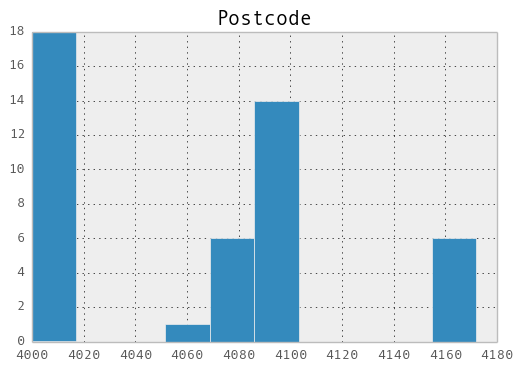

In [305]:
df.hist(column="Postcode");

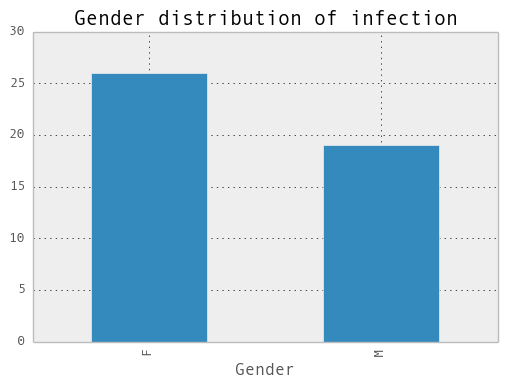

In [306]:
df['Gender'].groupby([df['Gender']]).count().plot(kind='bar', 
                                                  legend=False, 
                                                  title="Gender distribution of infection");